<a href="https://colab.research.google.com/github/itsCheithanya/KubeCasten/blob/main/bi_lstmwith_paper_specs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


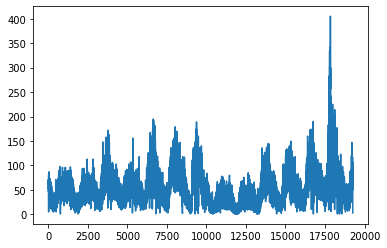

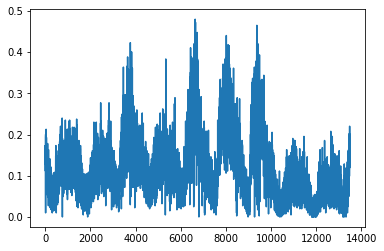

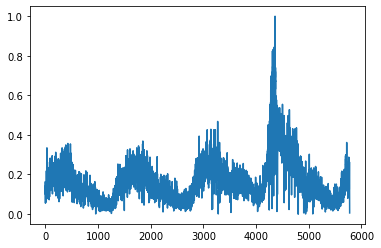

[[0.14851485 0.13861386 0.17326733 0.17079208 0.13118812 0.12623762
  0.16584158 0.11386139 0.11138614 0.12376238]
 [0.13861386 0.17326733 0.17079208 0.13118812 0.12623762 0.16584158
  0.11386139 0.11138614 0.12376238 0.17326733]
 [0.17326733 0.17079208 0.13118812 0.12623762 0.16584158 0.11386139
  0.11138614 0.12376238 0.17326733 0.13613861]
 [0.17079208 0.13118812 0.12623762 0.16584158 0.11386139 0.11138614
  0.12376238 0.17326733 0.13613861 0.10643564]
 [0.13118812 0.12623762 0.16584158 0.11386139 0.11138614 0.12376238
  0.17326733 0.13613861 0.10643564 0.0470297 ]]
[0.17326733 0.13613861 0.10643564 0.0470297  0.00990099]


In [5]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv('/content/drive/MyDrive/output2.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
# train_size = int(len(dataset) * 0.63)
# val_size=int((len(dataset) - train_size)*0.75)
# test_size = (len(dataset) - train_size) - val_size
# train, test ,val= dataset[0:train_size,:], dataset[train_size:train_size+val_size,:],dataset[train_size+val_size:len(dataset),:]
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] 
plt.plot(train)
plt.show()

# plt.plot(val)
# plt.show()

plt.plot(test)
plt.show()



# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#valX, valY = create_dataset(val, look_back)
print(trainX[:5])
print(trainY[:5])
#print(valX[:5])


In [6]:

# reshape input to be [samples, time steps, features]

trainX = trainX.reshape( (trainX.shape[0], trainX.shape[1], 1))
testX = testX.reshape( (testX.shape[0],trainX.shape[1], 1))
#testY=testY.reshape((trainY.shape[1],trainY.shape[0]))
#valX = valX.reshape( (valX.shape[0],valX.shape[1], 1))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
#print(valX.shape)

(13470, 10, 1)
(13470,)
(5767, 10, 1)
(5767,)


In [7]:
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM,GRU
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import *



In [8]:
# define model
# create and fit the LSTM network
# model = Sequential()
# model.add(Bidirectional(LSTM(64, activation='relu'), input_shape=(trainX.shape[1],trainX.shape[2] )))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# model.summary()

# model2 = Sequential()
# model2.add(Bidirectional(GRU(64, activation='relu'), input_shape=(trainX.shape[1], trainX.shape[2])))
# model2.add(Dropout(0.5))
# model2.add(Dense(1))

# model2.compile(optimizer='adam', loss='mse')

# model2.summary()


# model4 = Sequential()
# model4.add(InputLayer((trainX.shape[1],trainX.shape[2])))
# model4.add(GRU(64))
# model4.add(Dense(8, 'relu'))
# model4.add(Dense(1, 'linear'))
# model4.compile(optimizer='adam',loss='mse')

# model4.summary()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, GRU, Dense, Dropout
from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import SGD

# # Define the model architecture
# model = Sequential()
# model.add(InputLayer(input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(GRU(32, return_sequences=True))
# model.add(LSTM(32))
# model.add(Dense(8, activation='linear'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='linear', kernel_regularizer=l2(0.01)))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

from tensorflow.keras import layers, regularizers, models

# model = models.Sequential([
#     layers.Bidirectional(layers.GRU(units=32, activation='relu', return_sequences=True),
#                           input_shape=(trainX.shape[1], trainX.shape[2])),
#      layers.add(Dropout(0.5))
#      layers.add(CNN)
#     layers.Dense(units=1, activation='relu', kernel_regularizer=regularizers.l2(0.01))
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')
model = Sequential()
model.add(Bidirectional(LSTM(30, activation='relu'), input_shape=( look_back,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
# model.fit(trainX, trainY, epochs=50, batch_size=64, verbose=0, validation_data=(testX, testY))

# Fit the model to the training data
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60)               7680      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 7,741
Trainable params: 7,741
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(trainX, trainY, epochs=50, batch_size=64,verbose=1, validation_data=(testX, testY))

Epoch 1/50
211/211 [==============================] - 11s 18ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 2/50
211/211 [==============================] - 3s 14ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 3/50
211/211 [==============================] - 5s 22ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 4/50
211/211 [==============================] - 3s 13ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 5/50
211/211 [==============================] - 3s 12ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 6/50
211/211 [==============================] - 3s 14ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 7/50
211/211 [==============================] - 4s 17ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 8/50
211/211 [==============================] - 4s 17ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 9/50
211/211 [==============================] - 3s 12ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 10/50
211/211 [==============================] - 3s 14ms/step - loss: 0.0014 - val_l

In [ ]:
# fit model
model2.fit(trainX, trainY, epochs=10, batch_size=10, verbose=0)

# from keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# model2.fit( trainX, trainY,validation_data=(valX, valY), epochs=15, callbacks=[early_stop])


KeyboardInterrupt: ignored

In [ ]:
# fit model
model4.fit(trainX, trainY, epochs=10, batch_size=10, verbose=0)


In [10]:
# make predictions
import time
trainPredict = model.predict(trainX)
start_time = time.time()
testPredict = model.predict(testX)
end_time = time.time()
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

181/181 [==============================] - 1s 4ms/step


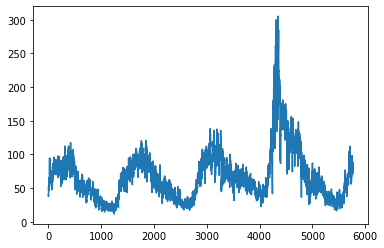

In [11]:


plt.plot(testPredict)
plt.show()




Train Score: 14.64 RMSE
Test Score: 20.55 RMSE
Time taken for prediction: 1.33 seconds


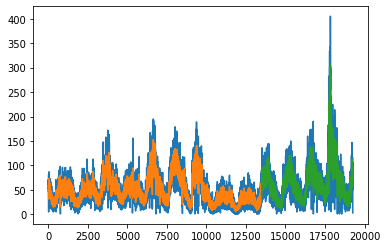

In [12]:
from sklearn.metrics import mean_squared_error
#  calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



print('Time taken for prediction: {:.2f} seconds'.format(end_time - start_time))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()